In [1]:
import arviz as az
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns

import utils

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
sns.set_theme(style="darkgrid")

In [3]:
num_tests: list[int] = [200, 500]
effect_to_name: dict[str, str] = {
    "control": "pretraining boost",
    "treatment": "evaluation bias",
}

In [4]:
accuracies_home_dir = "accuracies_from_paper"
num_test_to_num_correct_df = {
    num_test: utils.load_all_num_correct(accuracies_home_dir, num_test)
    for num_test in num_tests
}
num_test_to_effect_to_summary = {
    num_test: {
        effect: az.from_netcdf(f"main_{num_test}_{effect}_.nc")
        for effect in effect_to_name
    }
    for num_test in num_tests
}

In [5]:
num_test_to_diffs_df = {
    num_test: pl.DataFrame(
        {
            effect: utils.posterior_marginal_mean_diffs(
                num_test_to_effect_to_summary[num_test][effect],
                num_test_to_num_correct_df[num_test],
            )
            for effect in effect_to_name
        }
    )
    for num_test in num_tests
}

Marginalizing each draw:   0%|          | 0/4000 [00:00<?, ?it/s]

Marginalizing each draw:   0%|          | 0/4000 [00:00<?, ?it/s]

Marginalizing each draw:   0%|          | 0/4000 [00:00<?, ?it/s]

Marginalizing each draw:   0%|          | 0/4000 [00:00<?, ?it/s]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


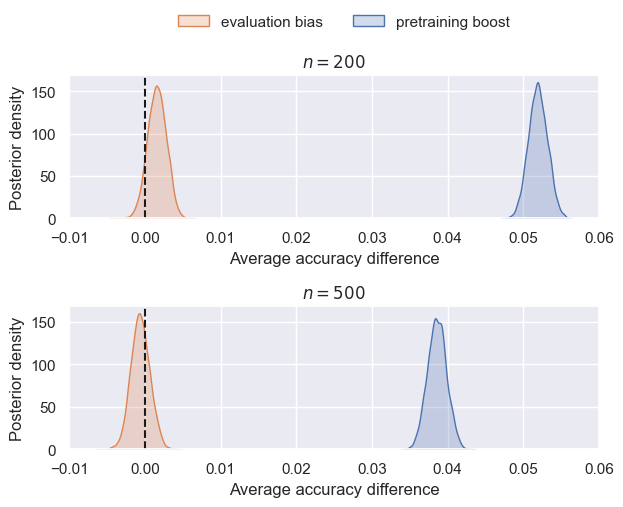

In [13]:
fig, axes = plt.subplots(nrows=len(num_tests), ncols=1)
xlim = (-0.01, 0.06)
axes: list[plt.Axes]
for subplot_idx, (num_test, diffs_df) in enumerate(num_test_to_diffs_df.items()):
    ax = axes[subplot_idx]
    _ = ax.set_xlim(xlim)
    _ = sns.kdeplot(ax=ax, data=diffs_df.rename(effect_to_name).to_pandas(), fill=True)
    ax.axvline(0, linestyle="dashed", color="k")
    _ = ax.set_xlabel("Average accuracy difference")
    _ = ax.set_ylabel("Posterior density")
    _ = ax.set_title(f"$n={{{num_test}}}$")

# fig.suptitle(f"Average accuracy differences\n", y=1.01)
fig.legend(
    handles=reversed(ax.legend_.legend_handles),
    labels=reversed([t.get_text() for t in ax.legend_.get_texts()]),
    ncol=2,
    loc="upper center",
    frameon=False,
    bbox_to_anchor=(0.55, 1.07),
)

for ax in axes:
    ax.legend().set_visible(False)

fig.tight_layout()